<a href="https://colab.research.google.com/github/ZerihunWaje/Machine-learning-projects/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/4.KNearestNeigbors
%ls

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/MyDrive/4.KNearestNeigbors'
/content
drive/  sample_data/


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Customers.csv")

print(df)

       Age  Income Student Credit_rating Buy_computer
0    young    high      no          fair           no
1    young    high      no     excellent           no
2   middle    high      no          fair          yes
3      old  medium      no          fair          yes
4      old     low     yes          fair          yes
5      old     low     yes     excellent           no
6   middle     low     yes     excellent          yes
7    young  medium      no          fair           no
8    young     low     yes          fair          yes
9      old  medium     yes          fair          yes
10   young  medium     yes     excellent          yes
11  middle  medium      no     excellent          yes
12  middle    high     yes          fair          yes
13     old  medium      no     excellent           no


In [7]:
d_age = {'young': 0, 'middle': 1, 'old': 2}
d_income = {'high': 0, 'medium': 1, 'low': 2}
d_student = {'no': 0, 'yes': 1}
d_credit_rating = {'fair': 0, 'excellent': 1}
d_buy_computer = {'no': 0, 'yes': 1}

df['Age'] = df['Age'].map(d_age)
df['Income'] = df['Income'].map(d_income)
df['Student'] = df['Student'].map(d_student)
df['Credit_rating'] = df['Credit_rating'].map(d_credit_rating)
df['Buy_computer'] = df['Buy_computer'].map(d_buy_computer)

print(df)

    Age  Income  Student  Credit_rating  Buy_computer
0     0       0        0              0             0
1     0       0        0              1             0
2     1       0        0              0             1
3     2       1        0              0             1
4     2       2        1              0             1
5     2       2        1              1             0
6     1       2        1              1             1
7     0       1        0              0             0
8     0       2        1              0             1
9     2       1        1              0             1
10    0       1        1              1             1
11    1       1        0              1             1
12    1       0        1              0             1
13    2       1        0              1             0


In [8]:
features = ['Age', 'Income', 'Student', 'Credit_rating']
data = df[features]
classes = df['Buy_computer']

In [9]:
print(data)
print('\n\n')
print(classes)

    Age  Income  Student  Credit_rating
0     0       0        0              0
1     0       0        0              1
2     1       0        0              0
3     2       1        0              0
4     2       2        1              0
5     2       2        1              1
6     1       2        1              1
7     0       1        0              0
8     0       2        1              0
9     2       1        1              0
10    0       1        1              1
11    1       1        0              1
12    1       0        1              0
13    2       1        0              1



0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buy_computer, dtype: int64


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

In [13]:
df_validation = pandas.read_csv("/content/drive/MyDrive/validation_set.csv")

print(df_validation)

       Age Income Student Credit_rating Buy_computer
0      old    low     yes          fair          yes
1      old   high      no          fair          yes
2    young    low      no     excellent           no
3   middle    low      no          fair           no
4      old    low     yes     excellent           no
5    young   high     yes     excellent          yes
6    young   high      no          fair          yes
7    young    low     yes          fair           no
8   middle   high     yes     excellent           no
9    young   high      no          fair          yes
10     old    low      no     excellent           no


In [14]:
df_validation['Age'] = df_validation['Age'].map(d_age)
df_validation['Income'] = df_validation['Income'].map(d_income)
df_validation['Student'] = df_validation['Student'].map(d_student)
df_validation['Credit_rating'] = df_validation['Credit_rating'].map(d_credit_rating)

df_validation['Buy_computer'] = df_validation['Buy_computer'].map(d_buy_computer)

test_df = df_validation[features]

print(test_df)

    Age  Income  Student  Credit_rating
0     2       2        1              0
1     2       0        0              0
2     0       2        0              1
3     1       2        0              0
4     2       2        1              1
5     0       0        1              1
6     0       0        0              0
7     0       2        1              0
8     1       0        1              1
9     0       0        0              0
10    2       2        0              1


In [15]:
predicted_classes = list(knn.predict(test_df))

print(predicted_classes)

[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


In [16]:
actual_classes = df_validation['Buy_computer'].values.tolist()

print(actual_classes)

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

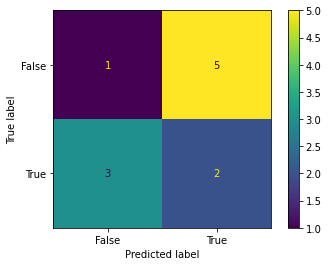

In [ ]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
print(Accuracy)

0.2727272727272727


In [ ]:
Precision = metrics.precision_score(actual_classes, predicted_classes)
print(Precision)

0.25


In [ ]:
Sensitivity_recall = metrics.recall_score(actual_classes, predicted_classes)
print(Sensitivity_recall)

0.4


In [ ]:
Specificity = metrics.recall_score(actual_classes, predicted_classes, pos_label=0)
print(Specificity)

0.0


In [ ]:
F1_score = metrics.f1_score(actual_classes, predicted_classes)
print(F1_score)

0.3333333333333333


In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.2727272727272727, 'Precision': 0.2857142857142857, 'Sensitivity_recall': 0.4, 'Specificity': 0.16666666666666666, 'F1_score': 0.3333333333333333}


In [ ]:
data = df.values.tolist()